# Análisis de los datos obtenidos en los tests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Datos obtenidos

Importar los datos obtenidos en los tests creado por el programa App.java de la carpeta src.

In [3]:
# Read in the data from db
conn = sqlite3.connect("../db.sqlite")
df = pd.read_sql_query("SELECT * FROM execution_times", conn)
df.head()

,test_name,execution_time
0,isPrime,21400
1,isPrime,12800
2,isPrime,11900
3,isPrime,12500
4,isPrime,11200


Para analizar los datos mejor, se han separados los tests en diferentes columnas en el dataframe.

In [4]:
# Dive the data into the different unique values from the column "test_name"
tests = df["test_name"].unique()
print(tests)

# Create a new dataframe for each test
test_dfs = []
for test in tests:
    # Create new dataframe with only the test and execution time columns and reset the index
    new_df = df[df["test_name"] == test][["test_name", "execution_time"]].reset_index(
        drop=True
    )
    new_df = new_df.rename(columns={"test_name": test, "execution_time": f"time{test}"})
    test_dfs.append(new_df)

# Merge all the dataframes into one
merged_df = test_dfs[0]
for test_df in test_dfs[1:]:
    merged_df = pd.merge(merged_df, test_df, left_index=True, right_index=True)

merged_df.head()

['isPrime' 'trialDivision' 'trialDivision2' 'trialDivision3'
 'isPrimeBigInteger' 'millerRabin' 'millerRabin2']


,isPrime,timeisPrime,trialDivision,timetrialDivision,trialDivision2,timetrialDivision2,trialDivision3,timetrialDivision3,isPrimeBigInteger,timeisPrimeBigInteger,millerRabin,timemillerRabin,millerRabin2,timemillerRabin2
0,isPrime,21400,trialDivision,10500,trialDivision2,4800,trialDivision3,4400,isPrimeBigInteger,3300,millerRabin,7600,millerRabin2,8700
1,isPrime,12800,trialDivision,1500,trialDivision2,1800,trialDivision3,1500,isPrimeBigInteger,400,millerRabin,2000,millerRabin2,1700
2,isPrime,11900,trialDivision,1500,trialDivision2,1700,trialDivision3,1500,isPrimeBigInteger,300,millerRabin,1700,millerRabin2,1500
3,isPrime,12500,trialDivision,1500,trialDivision2,1700,trialDivision3,1500,isPrimeBigInteger,300,millerRabin,1700,millerRabin2,1500
4,isPrime,11200,trialDivision,2200,trialDivision2,1700,trialDivision3,1500,isPrimeBigInteger,200,millerRabin,1700,millerRabin2,1400


In [5]:
merged_df.describe()

,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2052.440000,1.736010e+03,1406.930000,1454.440000,121.510000,1525.950000,1641.910000
std,2019.222071,2.343784e+04,499.625798,515.089136,334.917209,607.424476,3590.562597
min,1300.000000,1.300000e+03,1300.000000,1300.000000,0.000000,1300.000000,1300.000000
25%,1500.000000,1.300000e+03,1300.000000,1300.000000,100.000000,1300.000000,1400.000000
50%,1600.000000,1.400000e+03,1400.000000,1400.000000,100.000000,1400.000000,1500.000000
75%,2000.000000,1.500000e+03,1400.000000,1400.000000,200.000000,1400.000000,1500.000000
max,52200.000000,2.344600e+06,31600.000000,30700.000000,17200.000000,38700.000000,258900.000000


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   isPrime                10000 non-null  object
 1   timeisPrime            10000 non-null  int64 
 2   trialDivision          10000 non-null  object
 3   timetrialDivision      10000 non-null  int64 
 4   trialDivision2         10000 non-null  object
 5   timetrialDivision2     10000 non-null  int64 
 6   trialDivision3         10000 non-null  object
 7   timetrialDivision3     10000 non-null  int64 
 8   isPrimeBigInteger      10000 non-null  object
 9   timeisPrimeBigInteger  10000 non-null  int64 
 10  millerRabin            10000 non-null  object
 11  timemillerRabin        10000 non-null  int64 
 12  millerRabin2           10000 non-null  object
 13  timemillerRabin2       10000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


## Datos de forma visual

En la siguientes gráficas se puede apreciar la diferencia de tiempo entre los diferentes tests realizados.

A continuación se muestran los datos en las siguientes gráficas:

- Gráfica de líneas
- Gráfica de líneas con x e y en escala logarítmica

<AxesSubplot:title={'center':'Execution times for all tests'}>

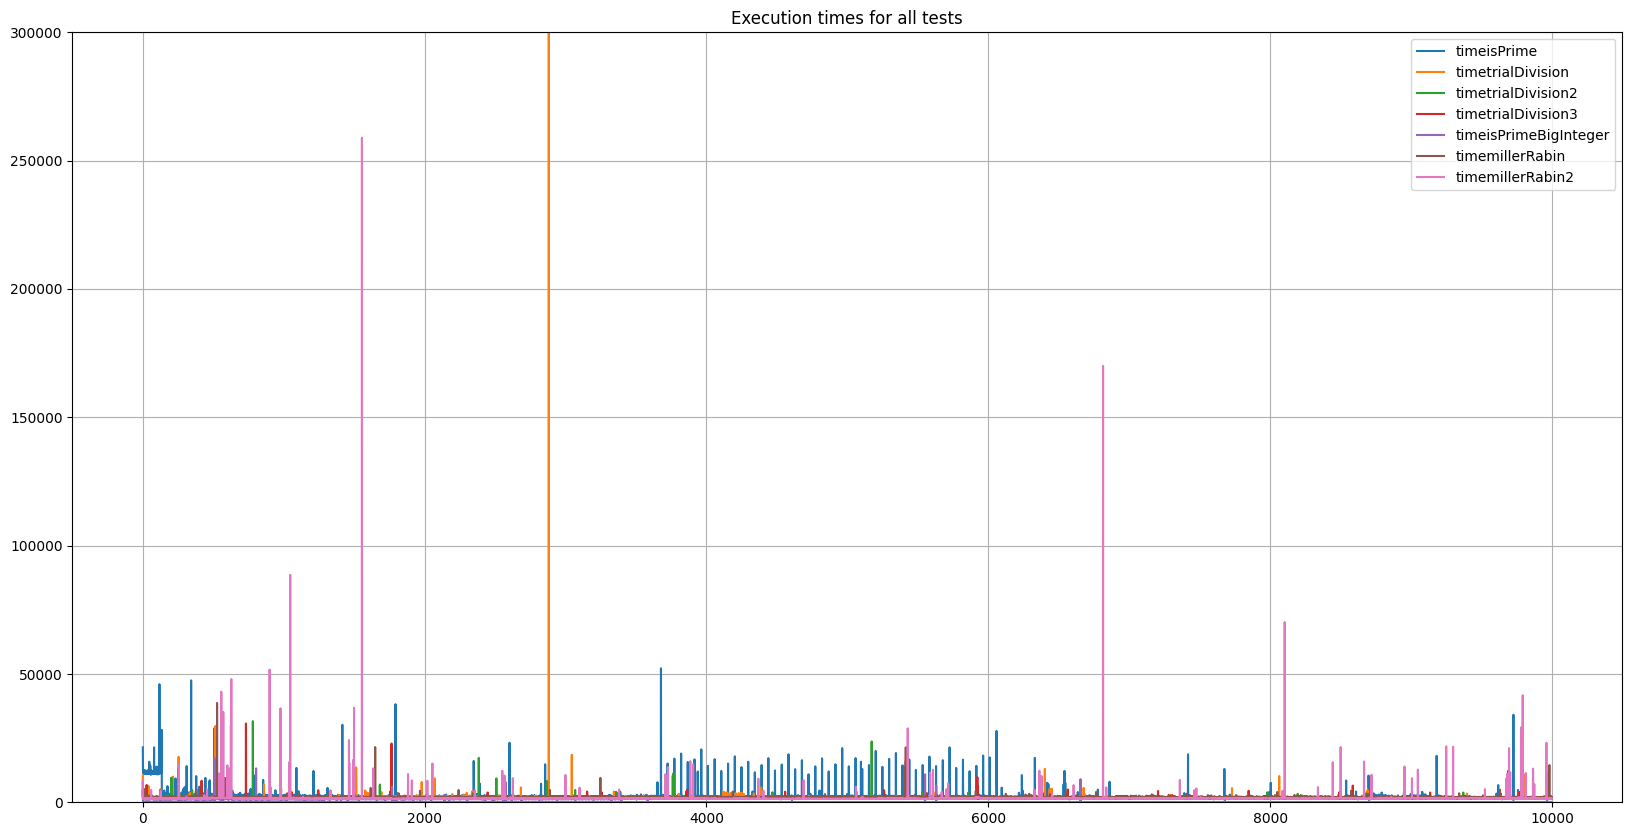

In [7]:
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, ylim=(0, 0.3e6))

<AxesSubplot:title={'center':'Execution times for all tests'}>

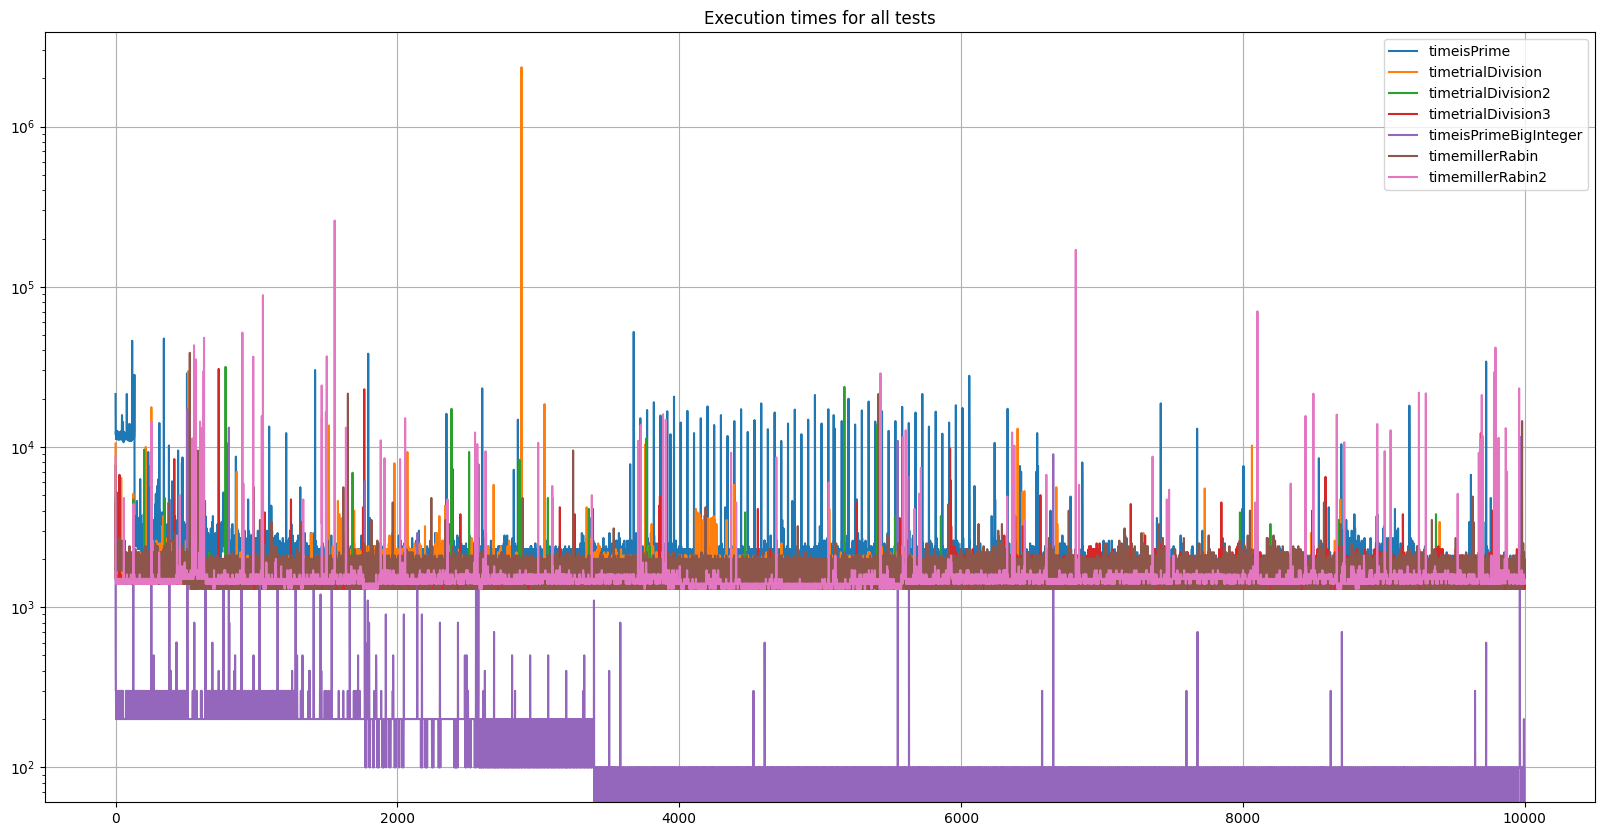

In [11]:
# Plot the data with a logarithmic y-axis
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, logy=True)

<AxesSubplot:title={'center':'Execution times for all tests'}>

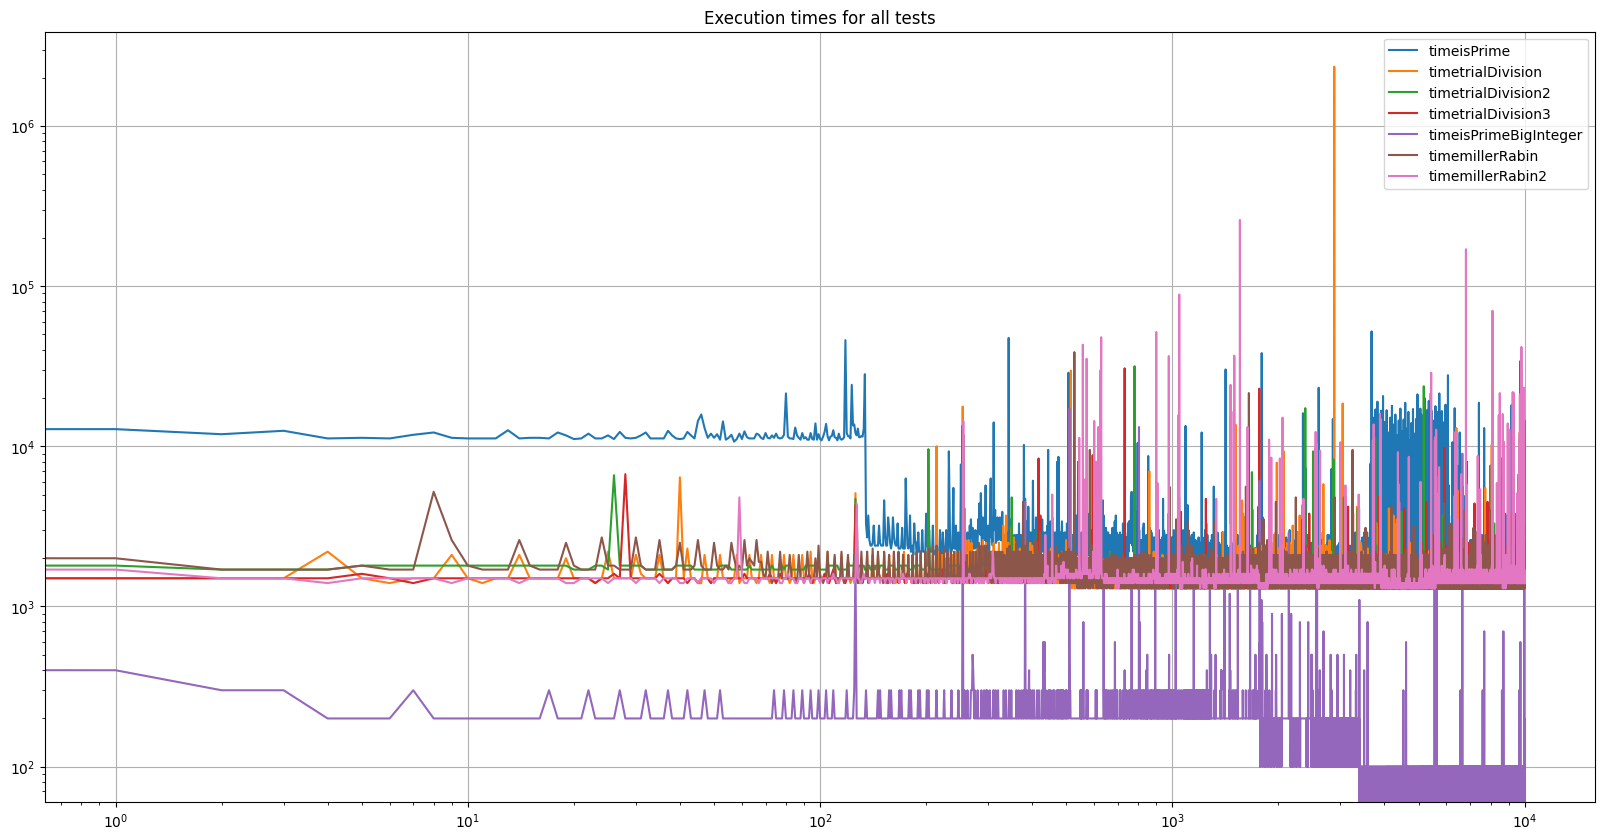

In [10]:
# Plot the data with a logarithmic y-axis and a logarithmic x-axis
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, logy=True, logx=True)

## Guardar los datos

Una vez se han analizado los datos, se guardan para procesarlos en el siguiente notebook ([algorithms_analysis.ipynd](./algorithms_analysis.ipynb))

In [14]:
# Save dataframe to csv
merged_df.to_csv("../data.csv", index=False)

# save dataframe to sqlite
conn = sqlite3.connect("../db.sqlite")
merged_df.to_sql("data", conn, if_exists="replace", index=False)
conn.close()